# How are in-demand skills trending for Data Analysts?

### Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

___

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filtering the Data for Data Analyst Jobs in the United States

In [2]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

## Grouping the Skills by Month

In [3]:
# Aggregating on a monthly basis
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

In [5]:
# Exploding job_skills column
df_DA_US_explode = df_DA_US.explode('job_skills')

In [12]:
#Pivoting / Grouping by month and job_skills
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [13]:
#Creating Total row inorder to sort job_skills column
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [14]:
# Sorting by the Total row using the .loc method to access the row
#Dropping the Total row
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index] #Specifying index
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,1,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,0,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,1,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,0,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,1,0,1,0,0,0,0,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,0,0,1,0


## Ploting the Monthly Skill Counts

<Axes: xlabel='job_posted_month_no'>

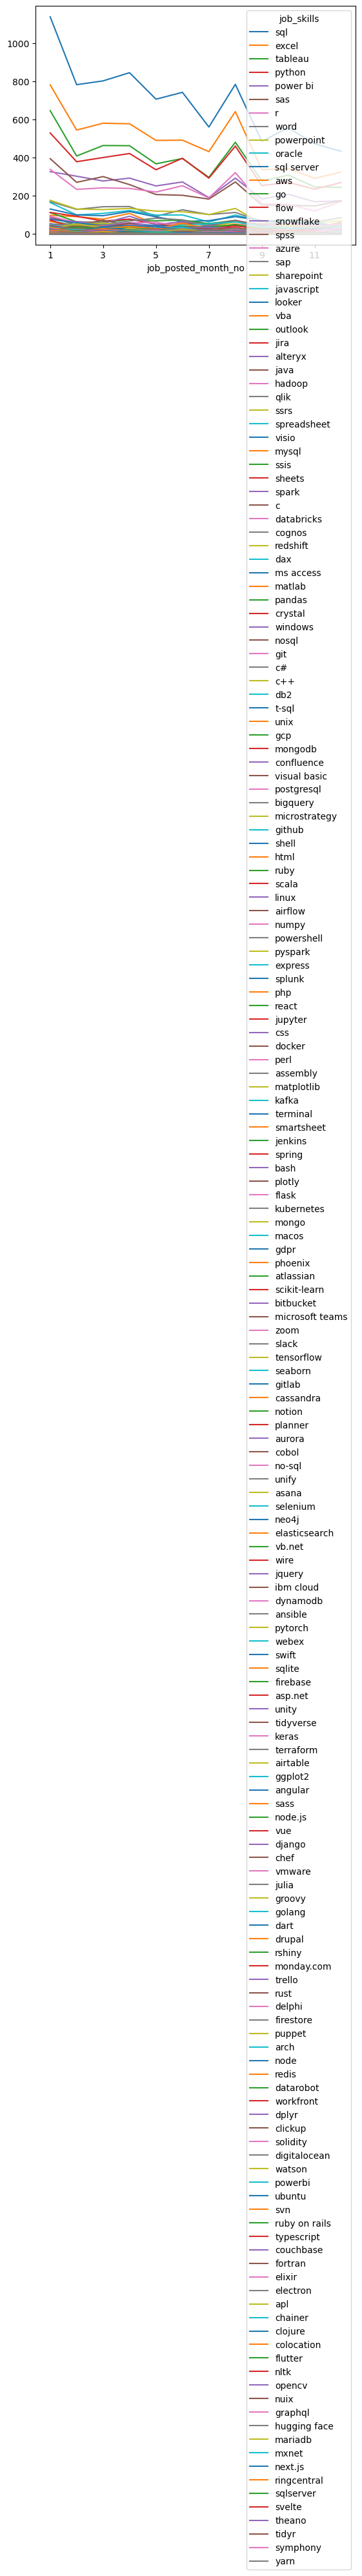

In [15]:
df_DA_US_pivot.plot(kind='line')

## Calculating Percentage

In [17]:
# Grouping to get the monthly job posting totals
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     1816
2     1284
3     1362
4     1369
5     1156
6     1207
7      955
8     1414
9      856
10    1002
11     848
12     817
dtype: int64

In [ ]:
# Dividing the rows by the monthly totals to get the percantage
# Dividing the first 12 rows of df_DA_pivot by DA_totals
# Could use a for loop, but the .div makes it easier

#.dive((other: scalar, sequence, Series, dict or DataFrame), (axis: {0 or 'index'. 1 or'columns'}))
    # other - Any single or multiplee element data structure, or lis-like object.
    # acis - Whether to compare by index (0 or 'index') or columns (1 or 'columns'). For Series input, axis to match Series index on.
df_DA_US_percent = df_DA_US_pivot.iloc[:12].div(DA_totals, axis=0)

df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0.626652,0.430066,0.355727,0.291300,0.179515,0.216960,0.186123,0.093062,0.096916,0.090308,...,0.000000,0.000000,0.000000,0.000551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.609034,0.423676,0.317757,0.294393,0.235202,0.210280,0.181464,0.099688,0.101246,0.077103,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.588840,0.425844,0.339941,0.293686,0.203377,0.220264,0.176946,0.104258,0.093245,0.078561,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.617239,0.421476,0.337473,0.307524,0.213294,0.188459,0.173850,0.104456,0.097151,0.089116,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.610727,0.423875,0.317474,0.290657,0.217128,0.178201,0.189446,0.079585,0.102941,0.084775,...,0.000865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.614747,0.406794,0.327258,0.328086,0.225352,0.167357,0.208782,0.104391,0.096106,0.082022,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.586387,0.451309,0.309948,0.305759,0.198953,0.190576,0.196859,0.105759,0.105759,0.064921,...,0.000000,0.000000,0.001047,0.000000,0.001047,0.000000,0.000000,0.000000,0.000000,0.001047
8,0.554455,0.453324,0.339463,0.325318,0.206506,0.192362,0.227016,0.079208,0.094059,0.069307,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.566589,0.392523,0.323598,0.295561,0.213785,0.175234,0.183411,0.075935,0.061916,0.078271,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001168,0.000000


In [ ]:
# Changing the month numbers to month names
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.000000,0.000000,0.055066,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.086505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.000000,0.104712,0.000000,0.104712,0.000000,0.000000,0.0000,0.000000,0.104712
Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.116822,0.000000


## Plotting Monthly Skill Demand

In [24]:
df_DA_US_percent.iloc[:, :5] # Specifying all the rows and the first five values


job_skills,sql,excel,tableau,python,power bi
job_posted_month,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542
Feb,60.903427,42.367601,31.775701,29.439252,23.520249
Mar,58.883994,42.584435,33.994126,29.368576,20.337739
Apr,61.723886,42.147553,33.747261,30.752374,21.329438
May,61.072664,42.387543,31.747405,29.065744,21.712803
Jun,61.474731,40.679370,32.725766,32.808616,22.535211
Jul,58.638743,45.130890,30.994764,30.575916,19.895288
Aug,55.445545,45.332390,33.946252,32.531825,20.650636
Sep,56.658879,39.252336,32.359813,29.556075,21.378505


<Axes: xlabel='job_posted_month'>

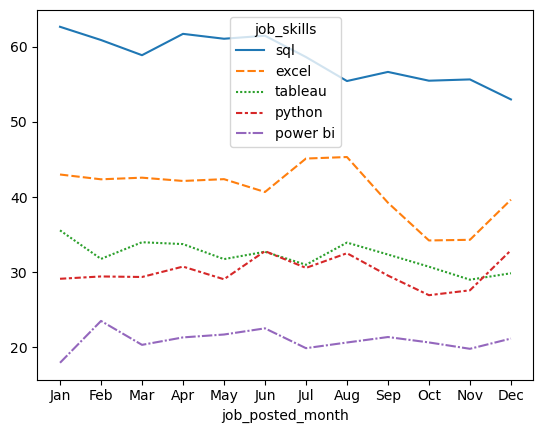

In [25]:
# Using Seaborn to plot

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot)

<Axes: xlabel='job_posted_month'>

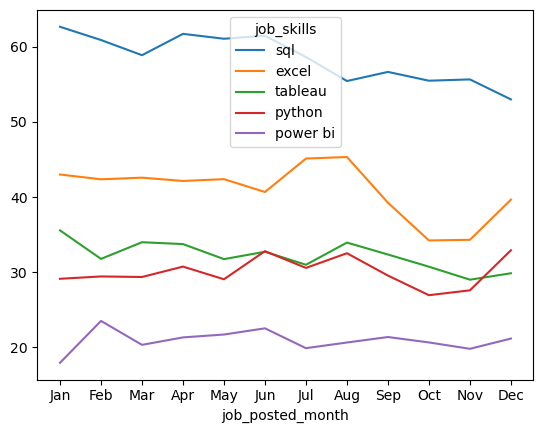

In [26]:
#Getting rid of th dashes and changing the color scheme

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')

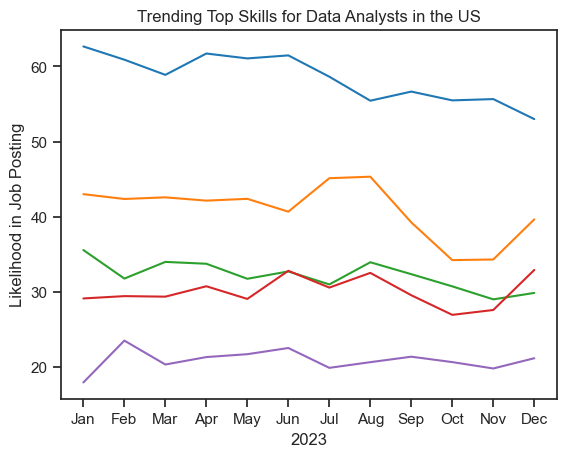

In [28]:
# Cleaning

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()


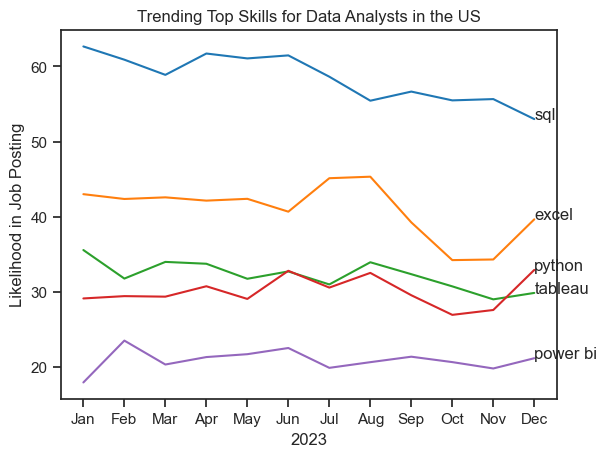

In [31]:
# Legend was remove in oredr to go through and label each line

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

for i in range(5):
    plt.text(11, df_plot.iloc[-1, i], df_plot.columns[i])
    #plt.text(x [Starting at 11 (Dec) so the labels can be toward the end],
    # y [(the vary last value in the data frame / the last row), for the column i, so it knows to go over one]),
    # value to plot/the string (want the column name [df_plot.columns]) and its provided in a list [i (to access the element in the list)]

plt.show()

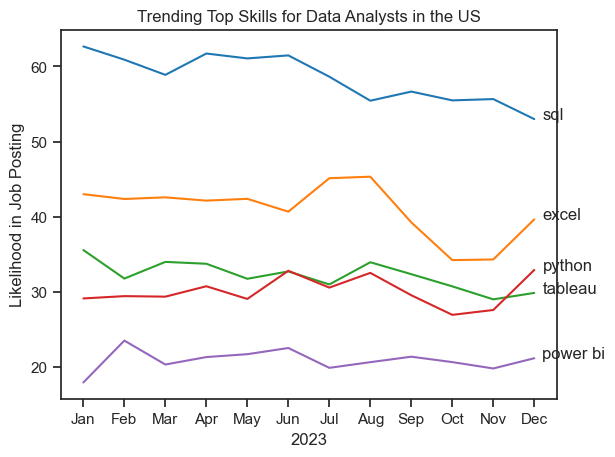

In [34]:
df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()


for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i]) #11.2, so the labels are not too close


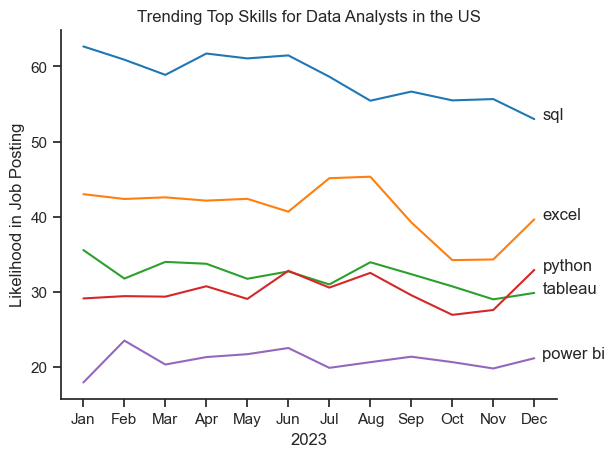

In [36]:
df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

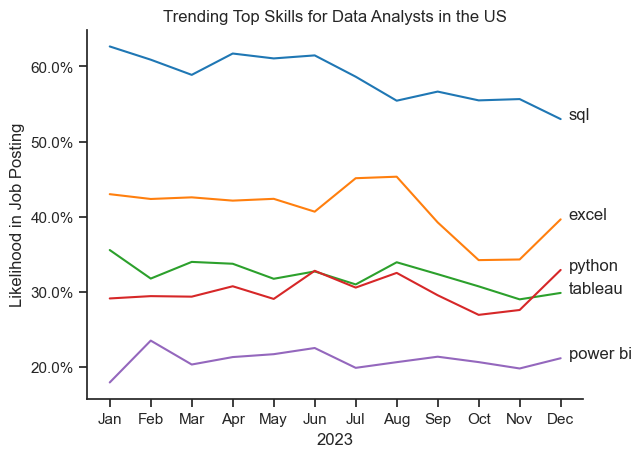

In [37]:
# Fomrating the y -axis 

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

plt.show()

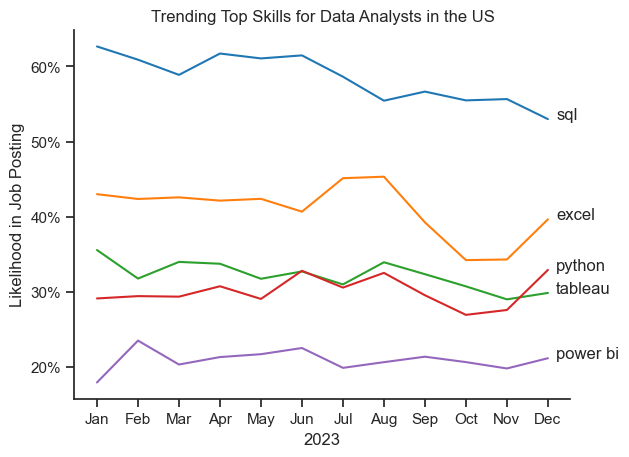

In [38]:
df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0)) # Getting rid of the decimal

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

plt.show()